The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


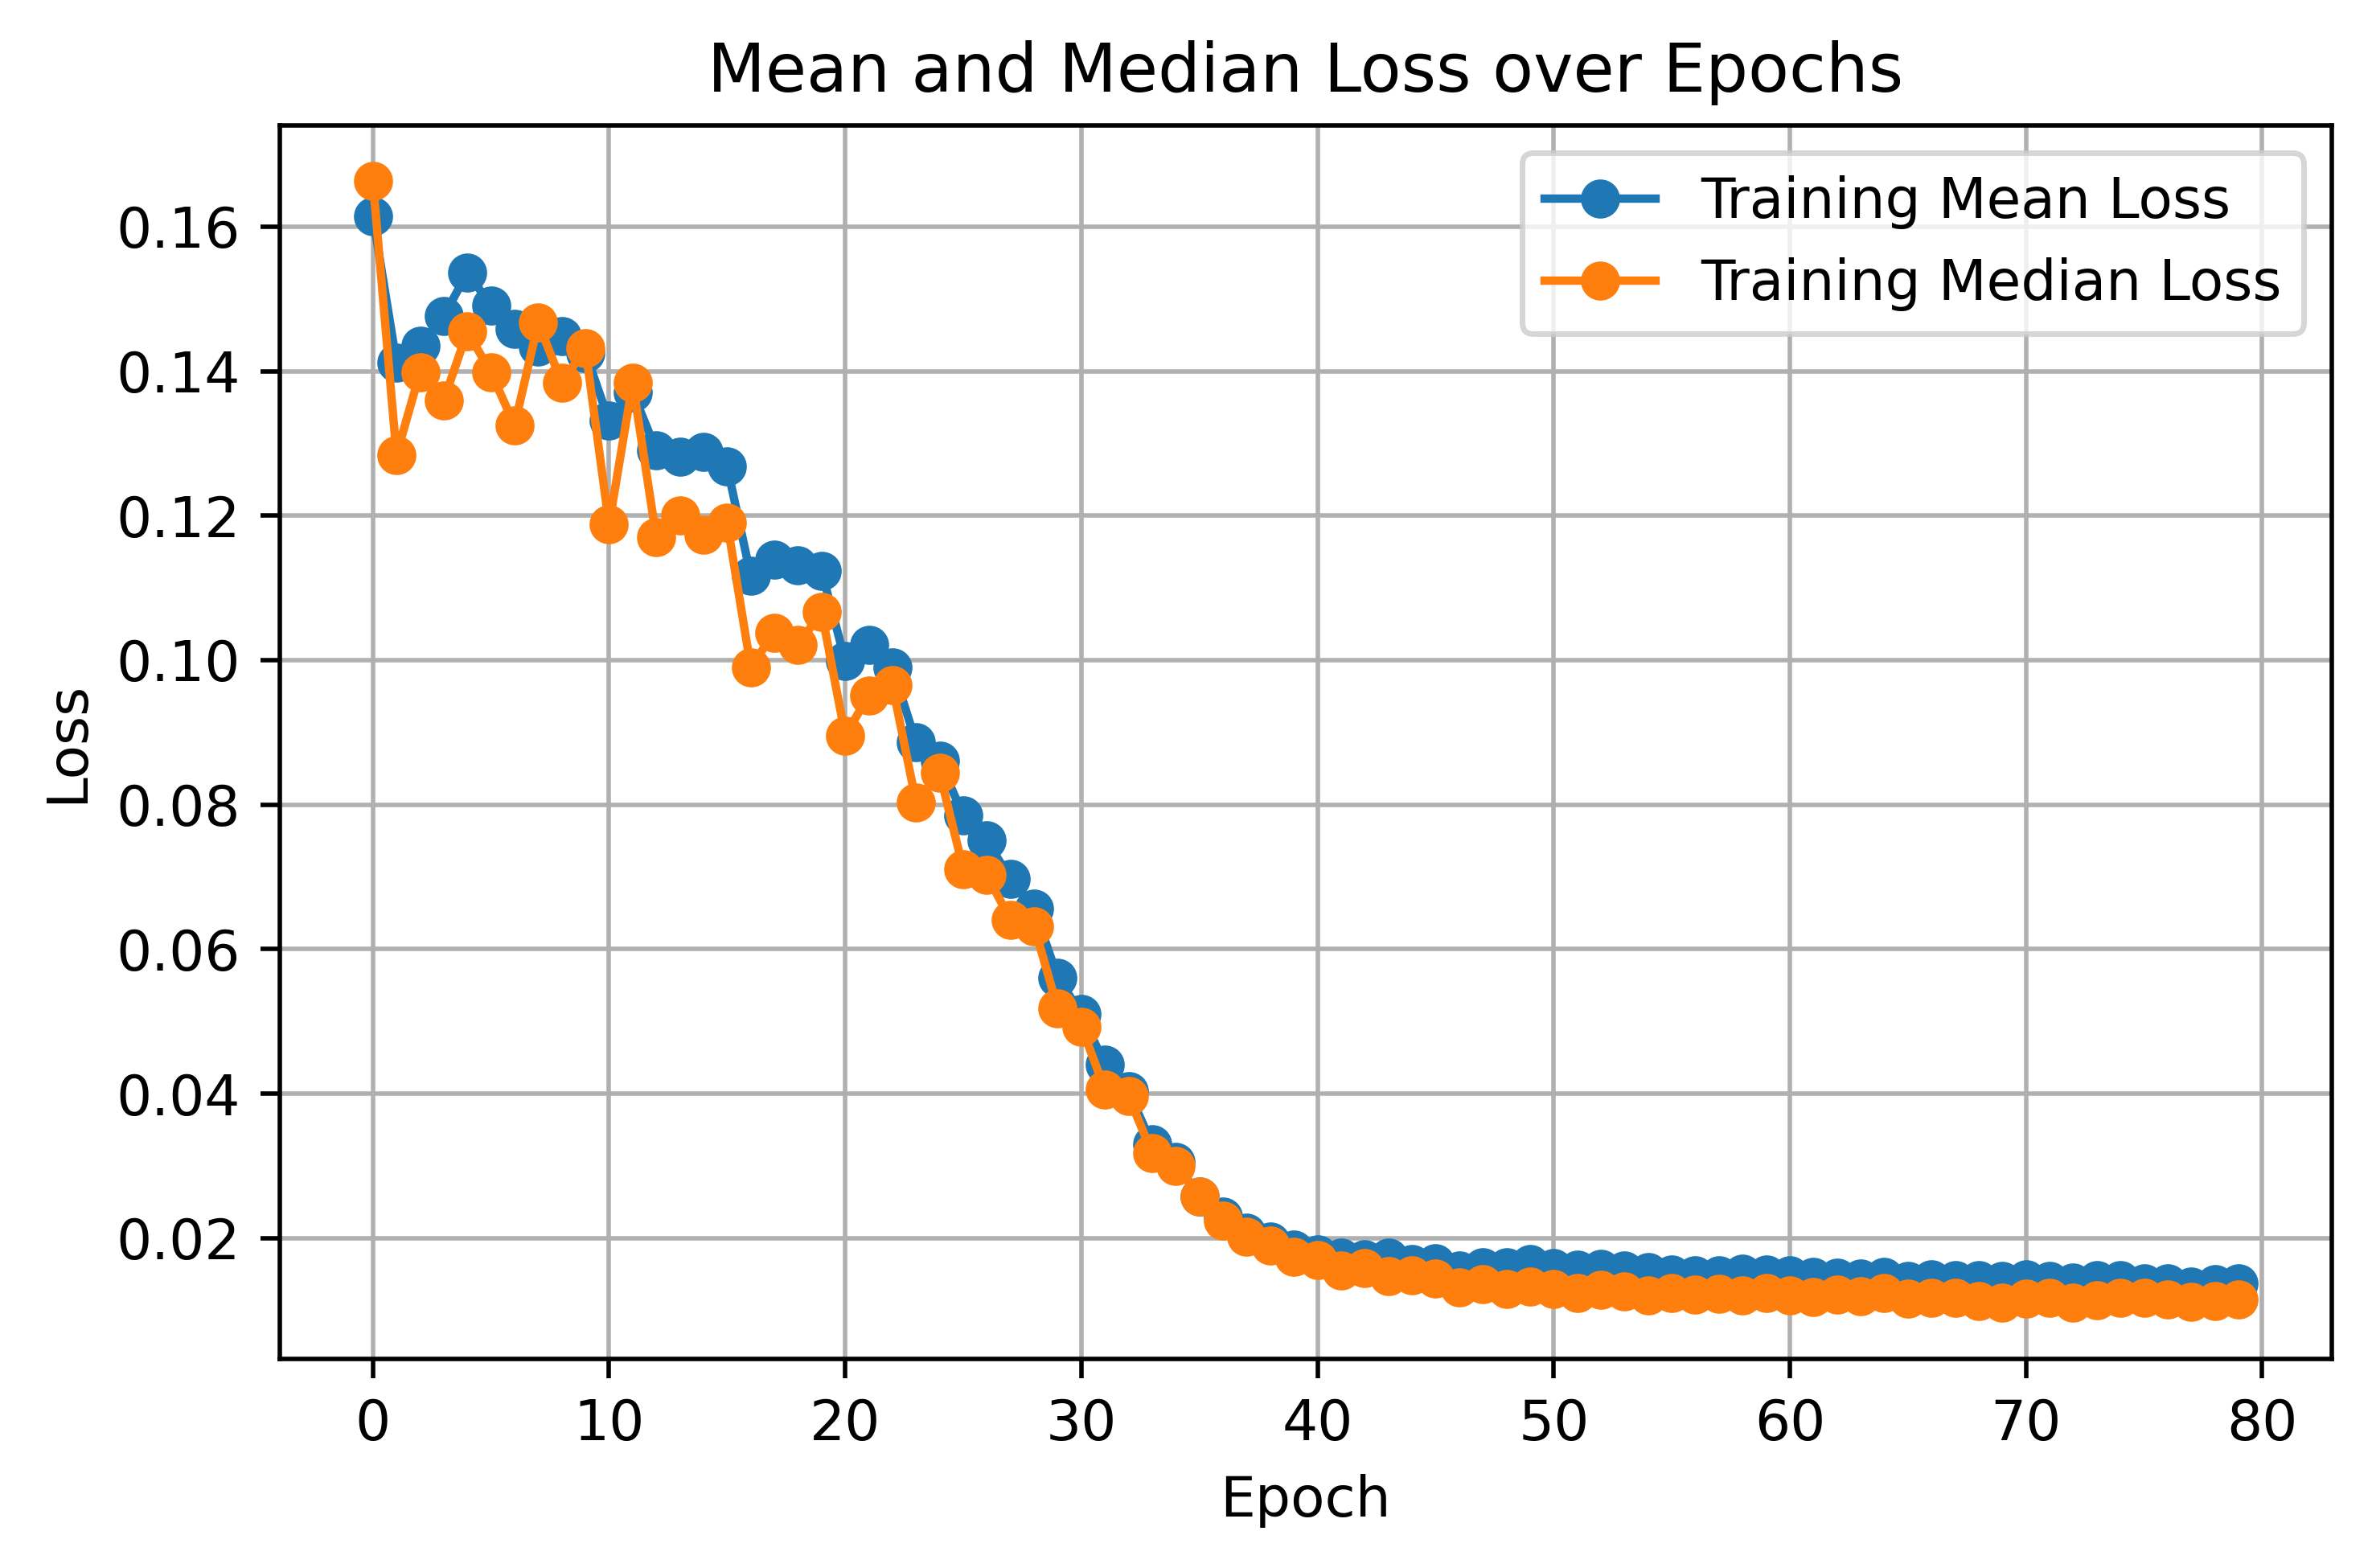

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


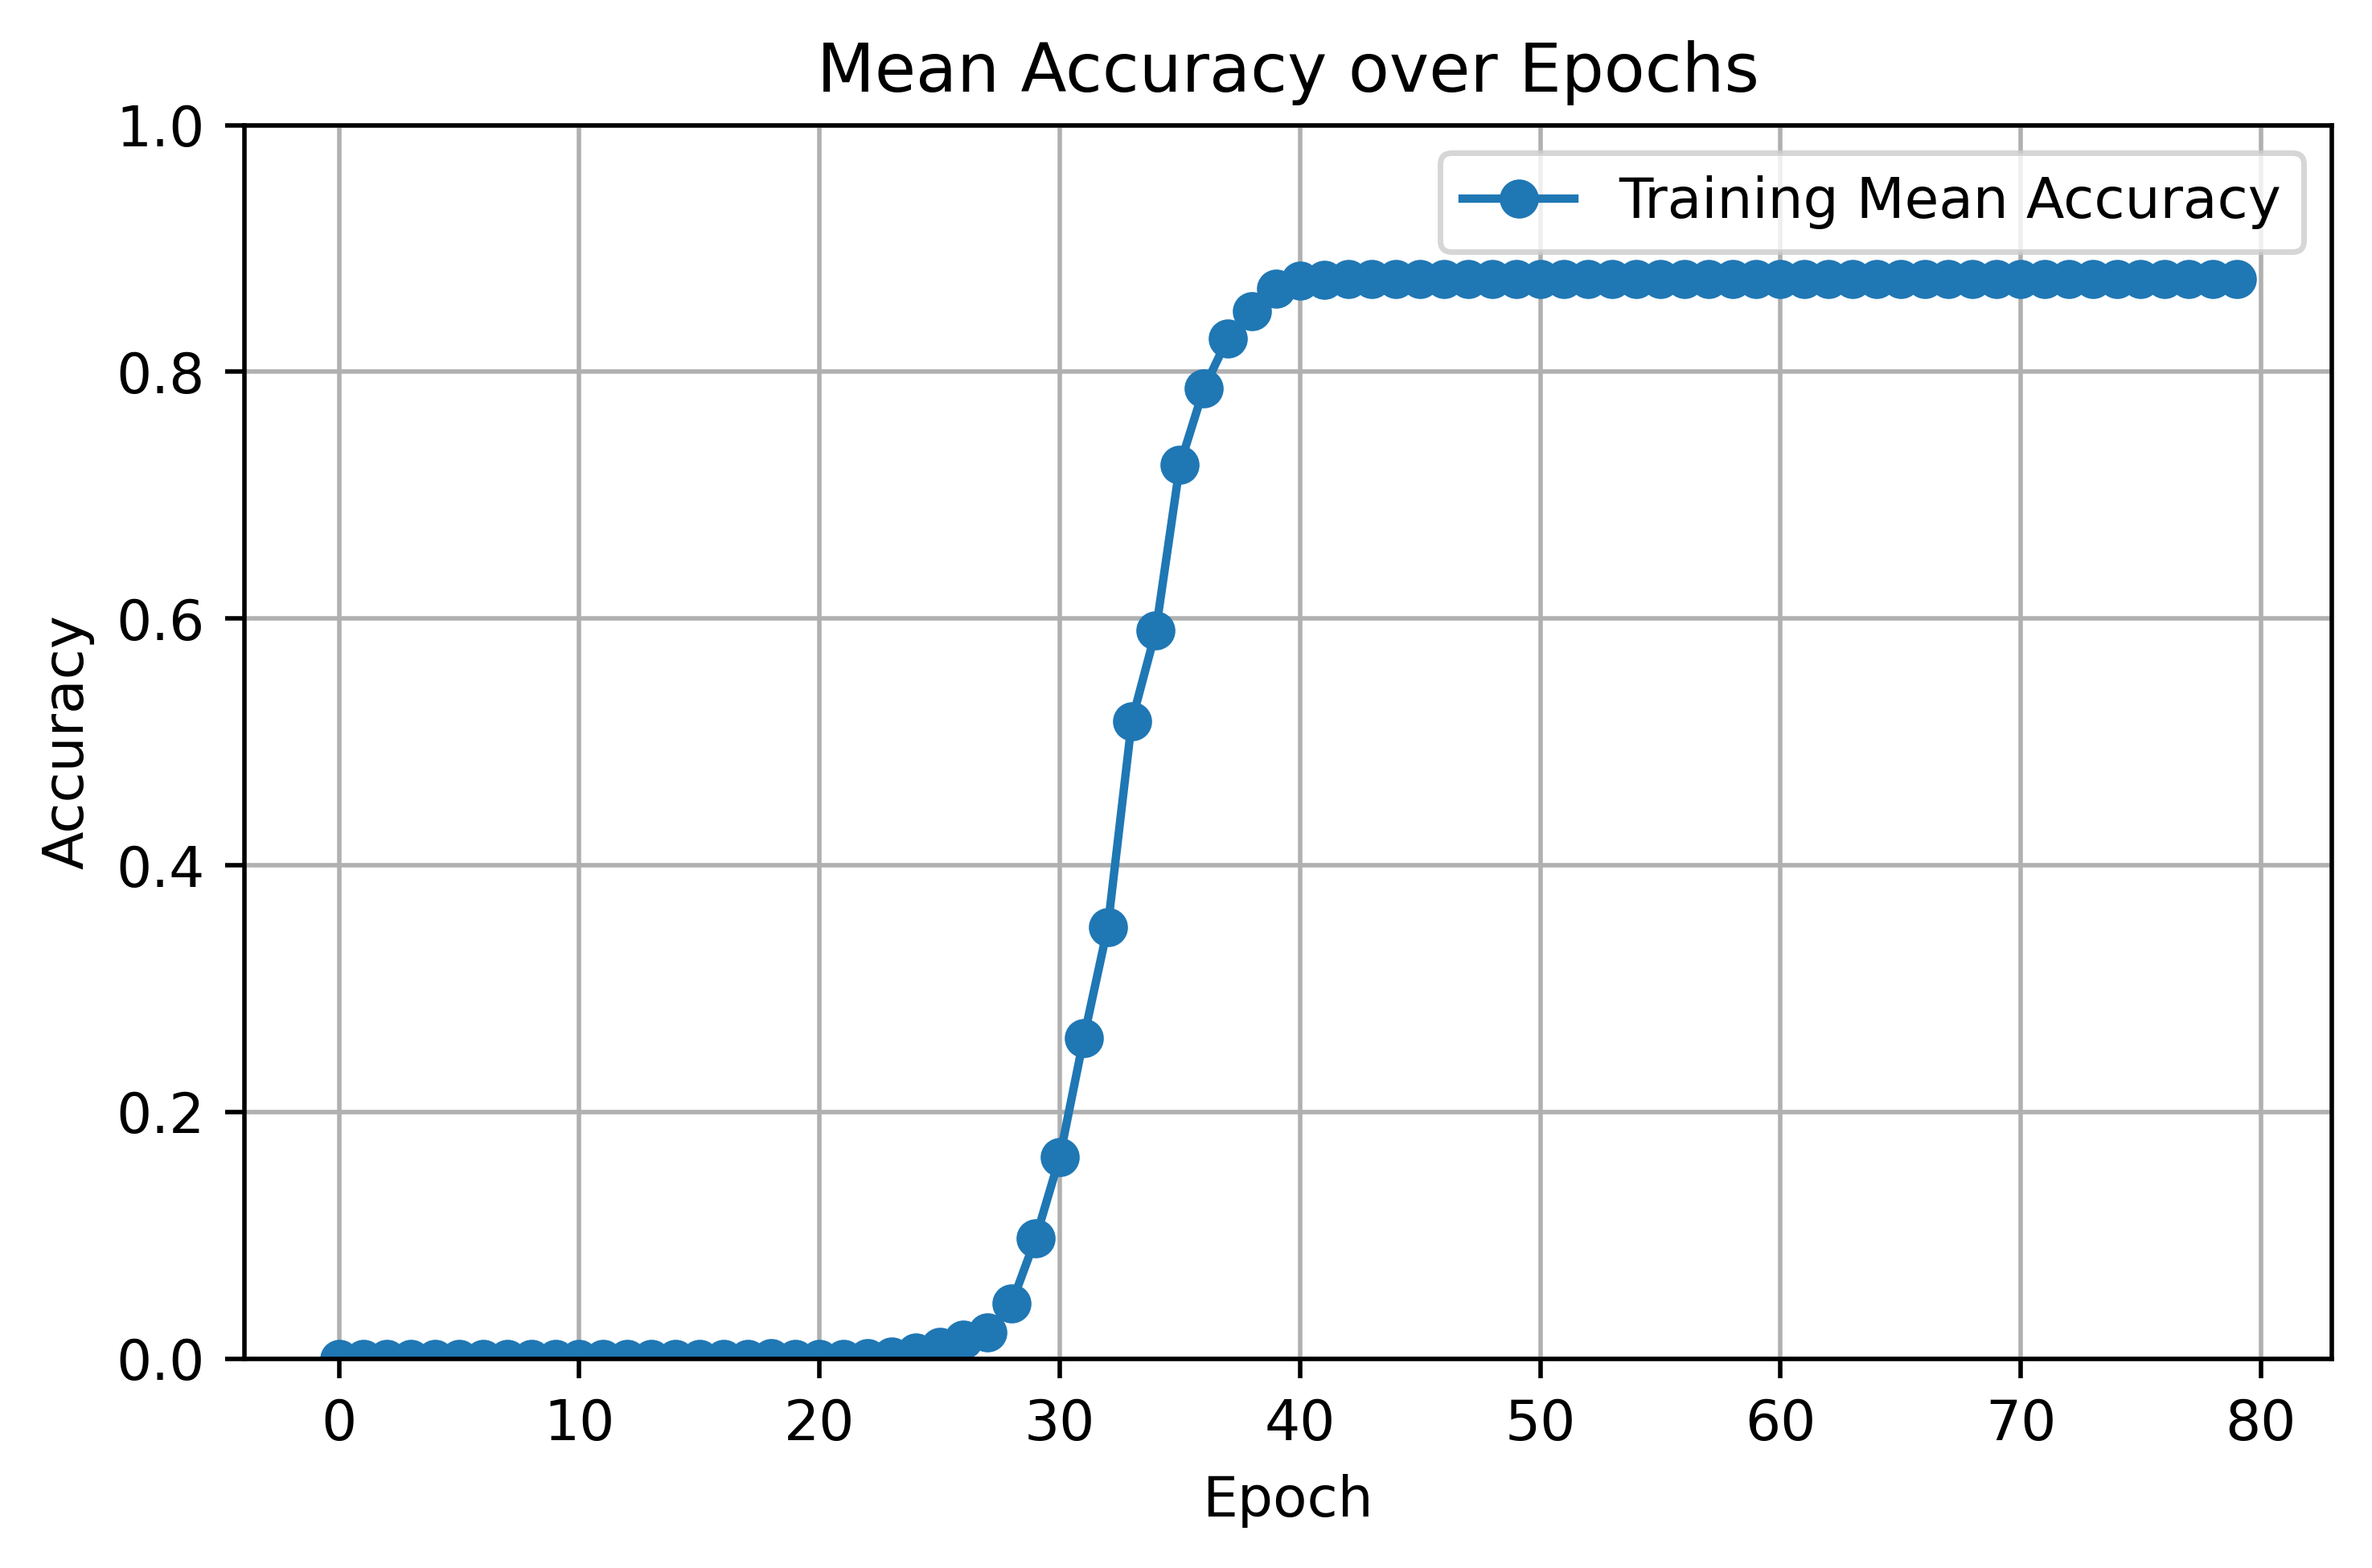

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


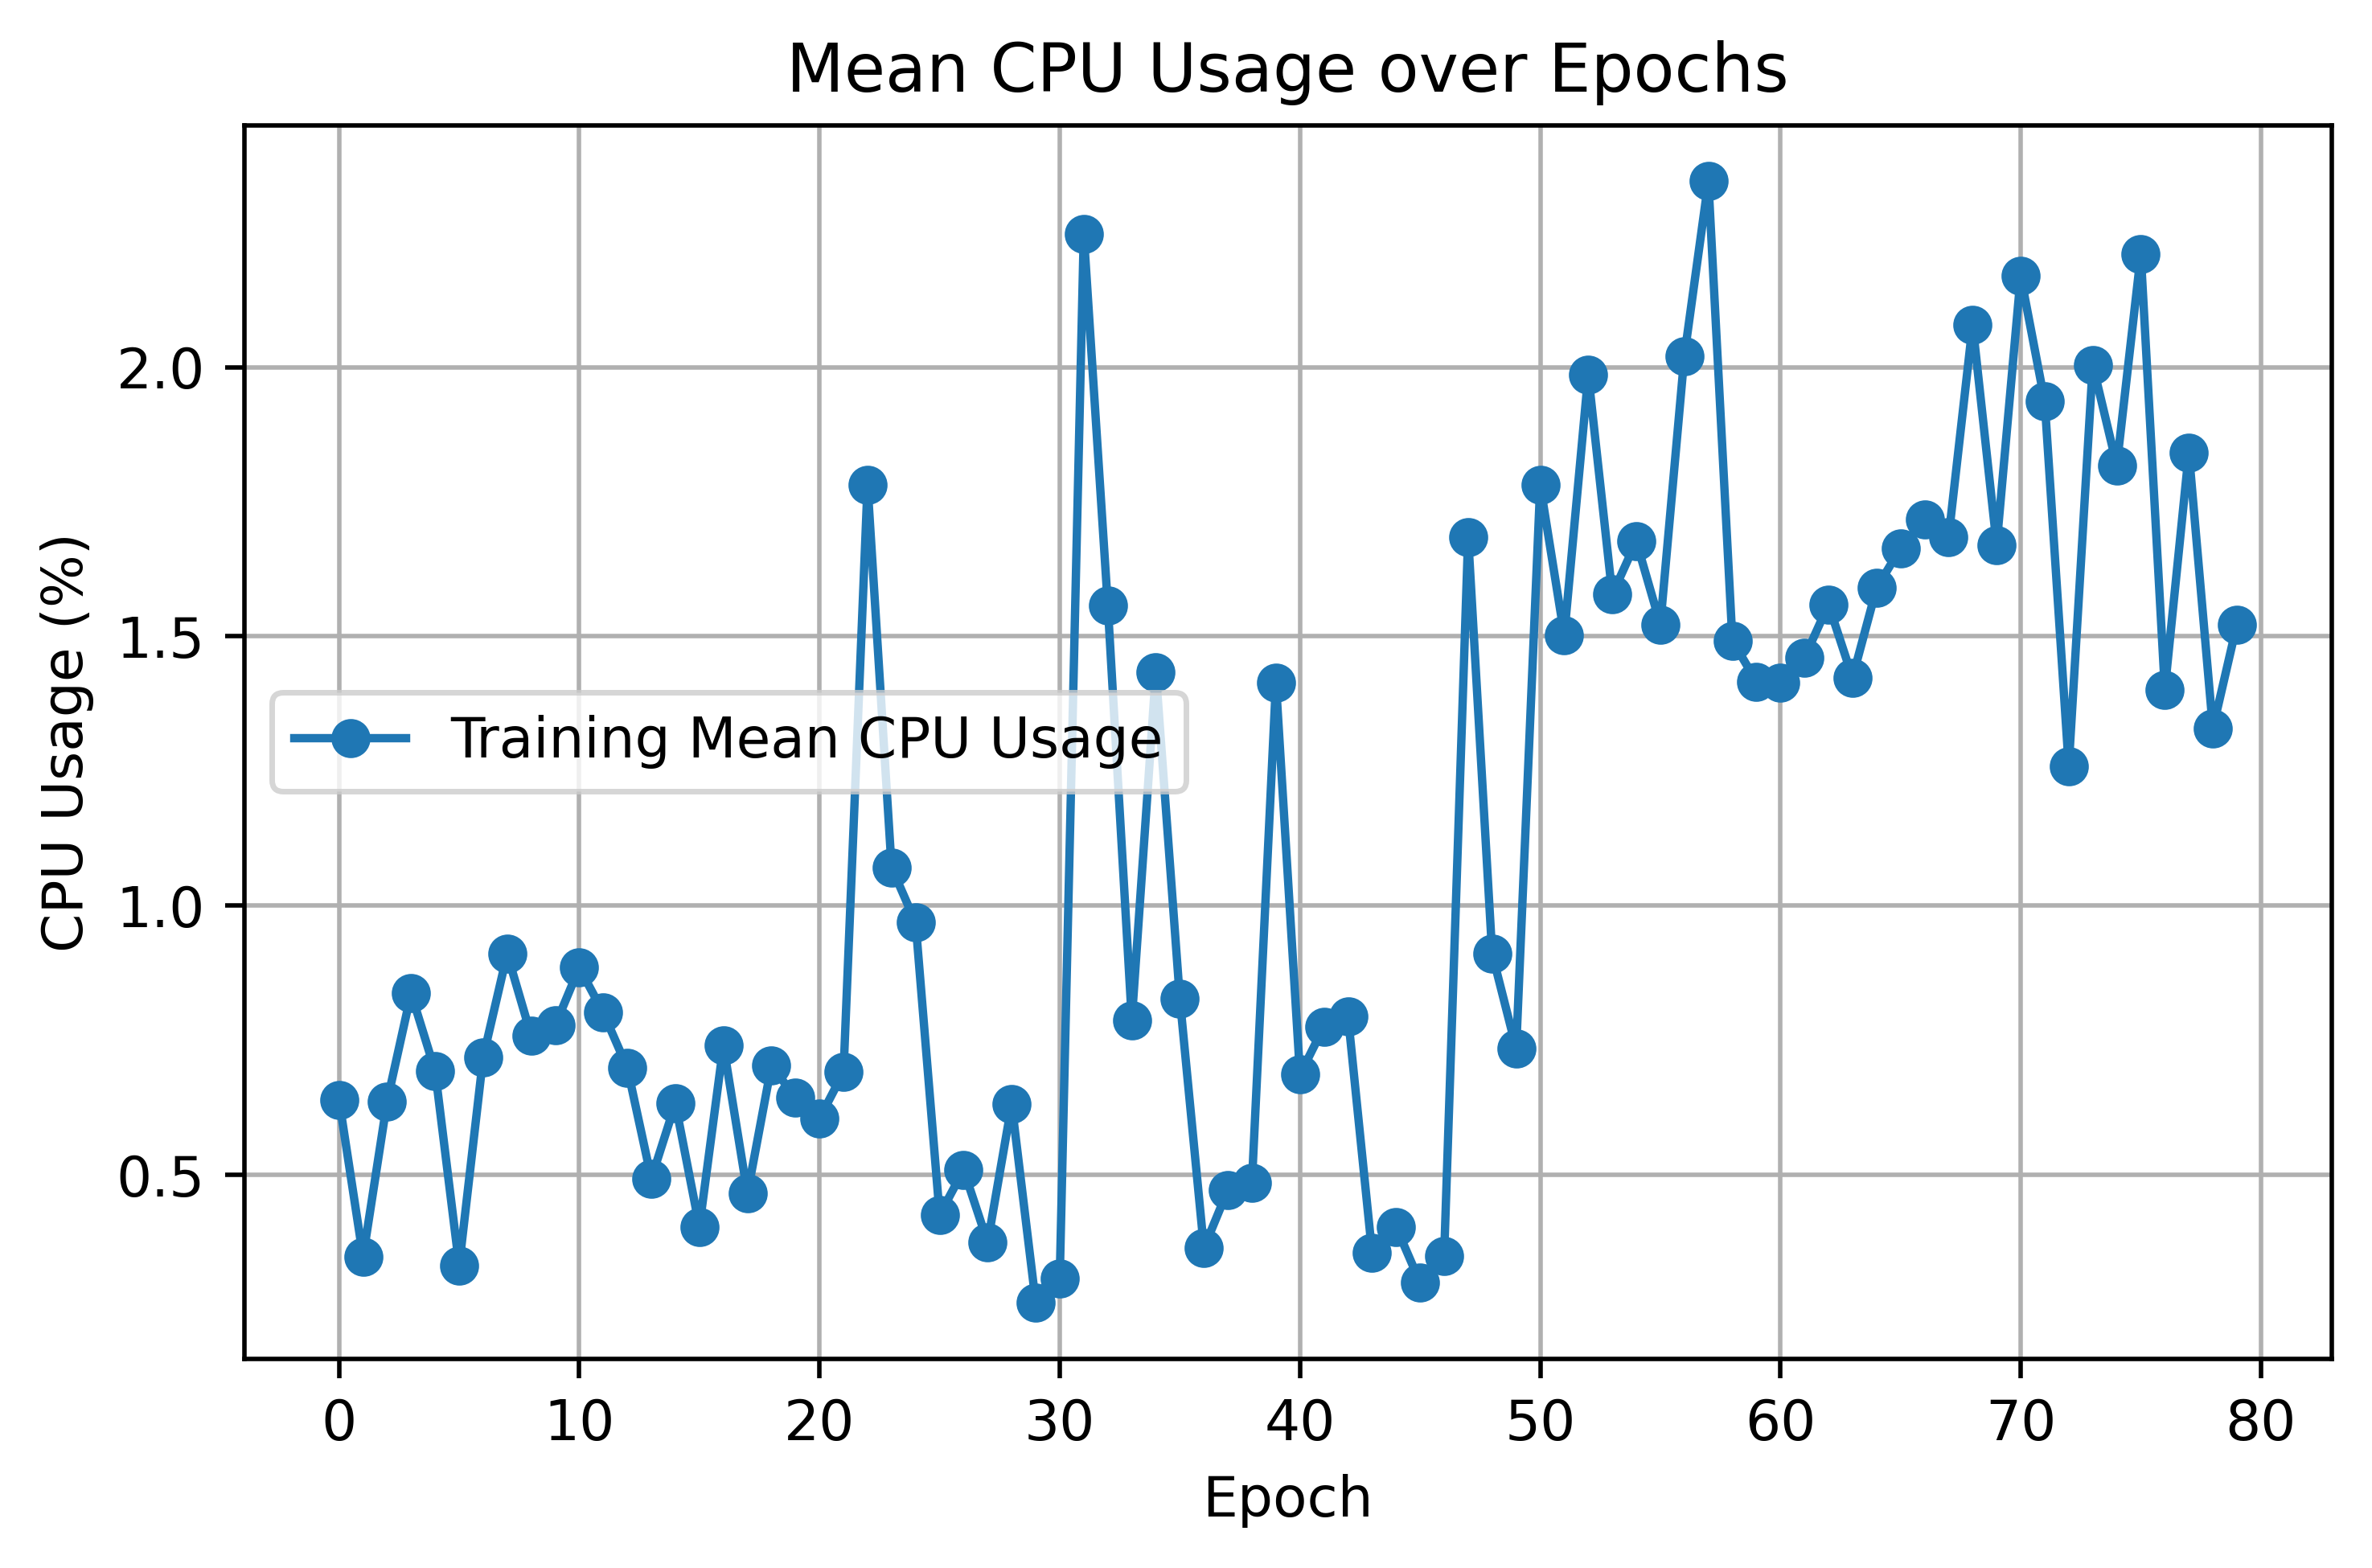

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


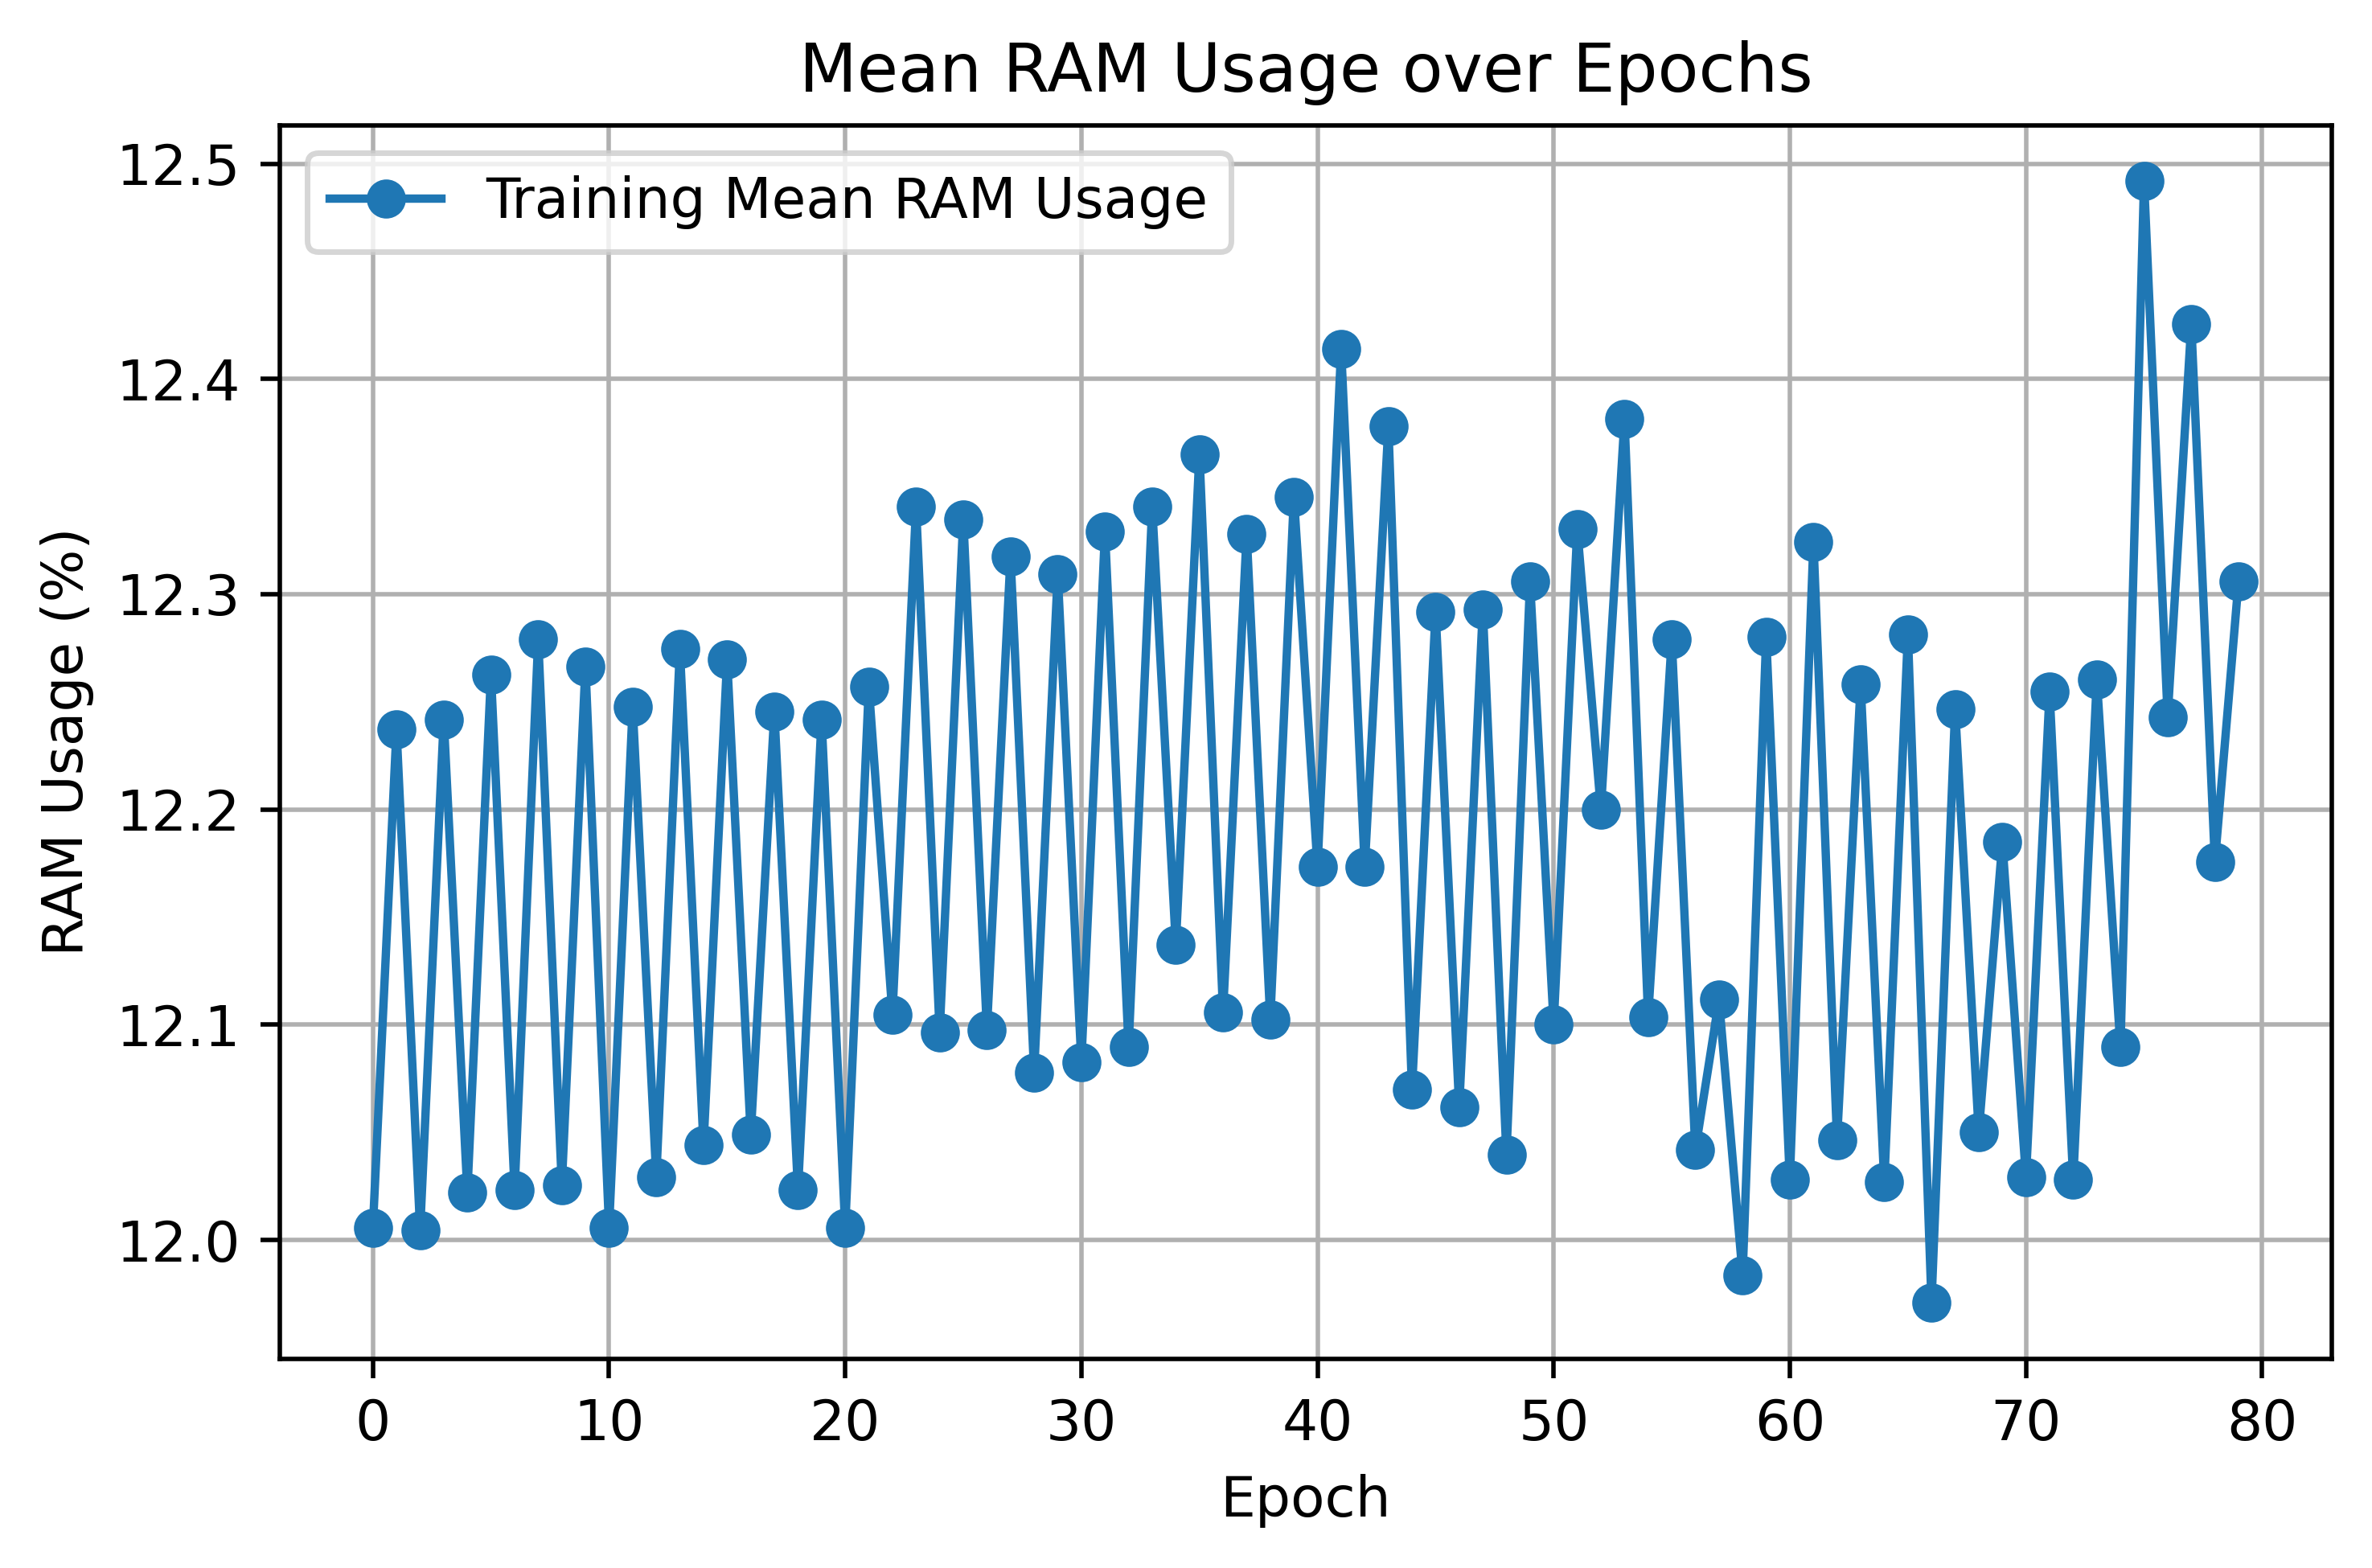

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


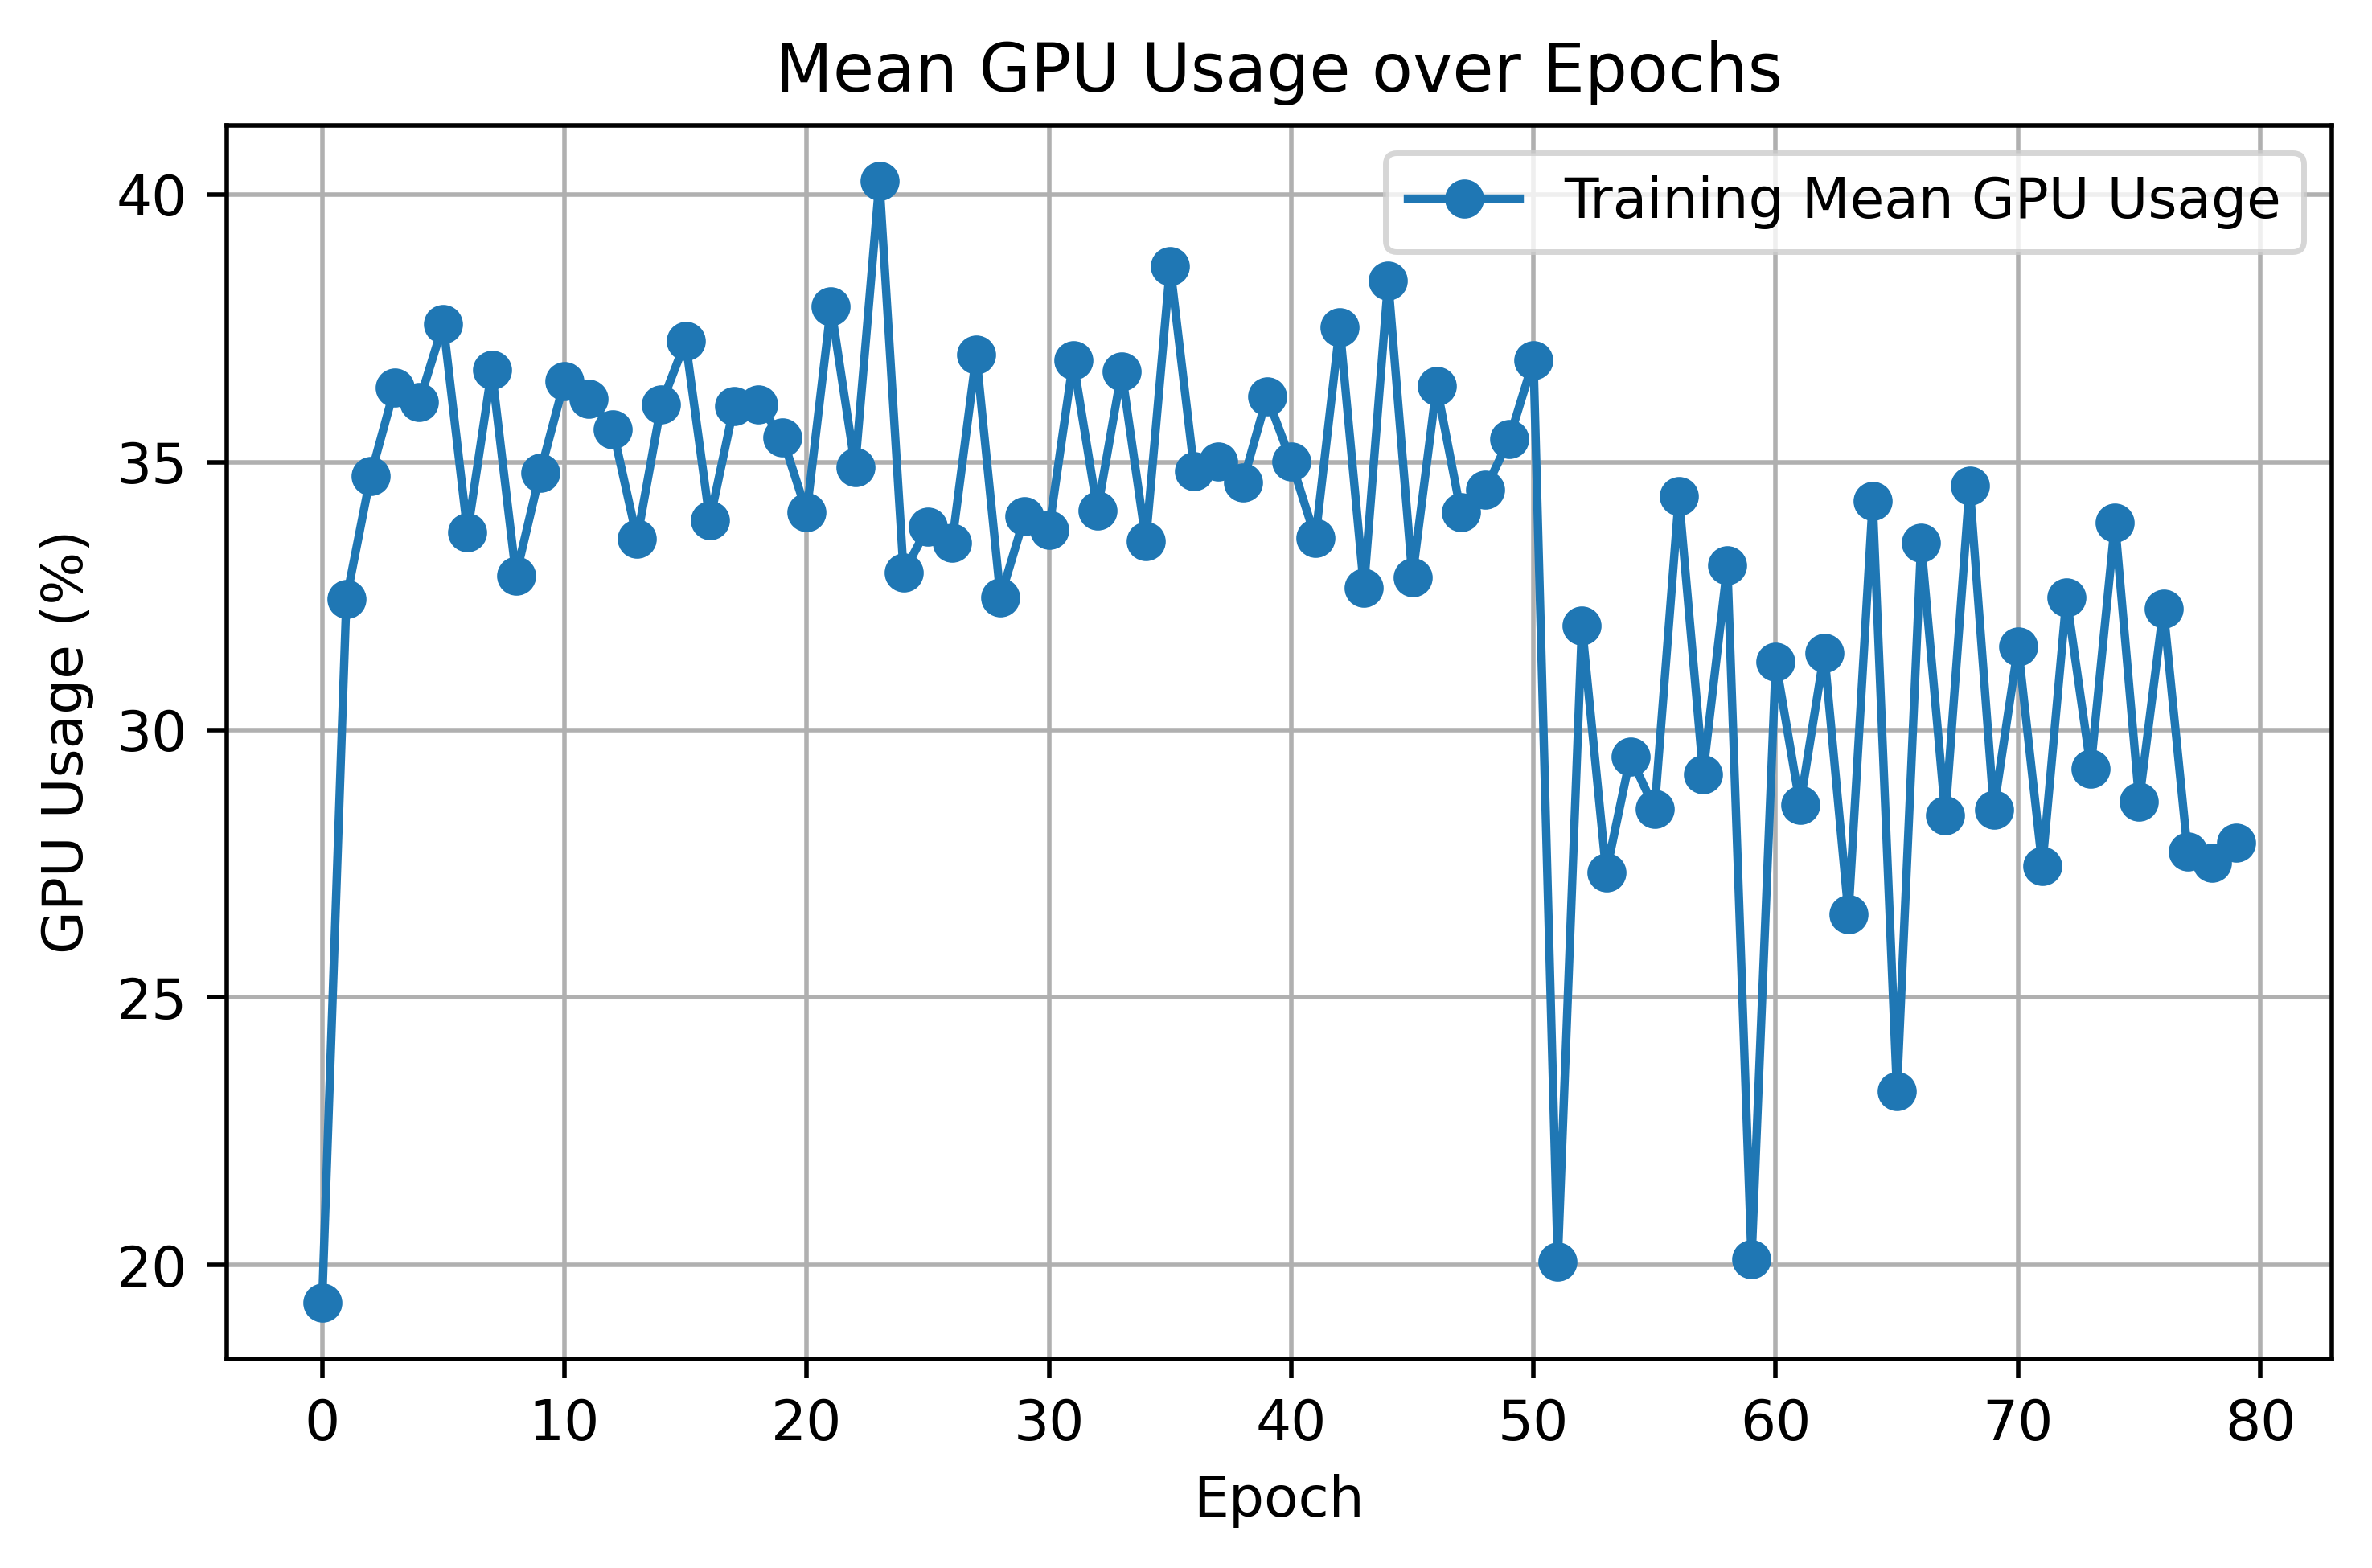

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


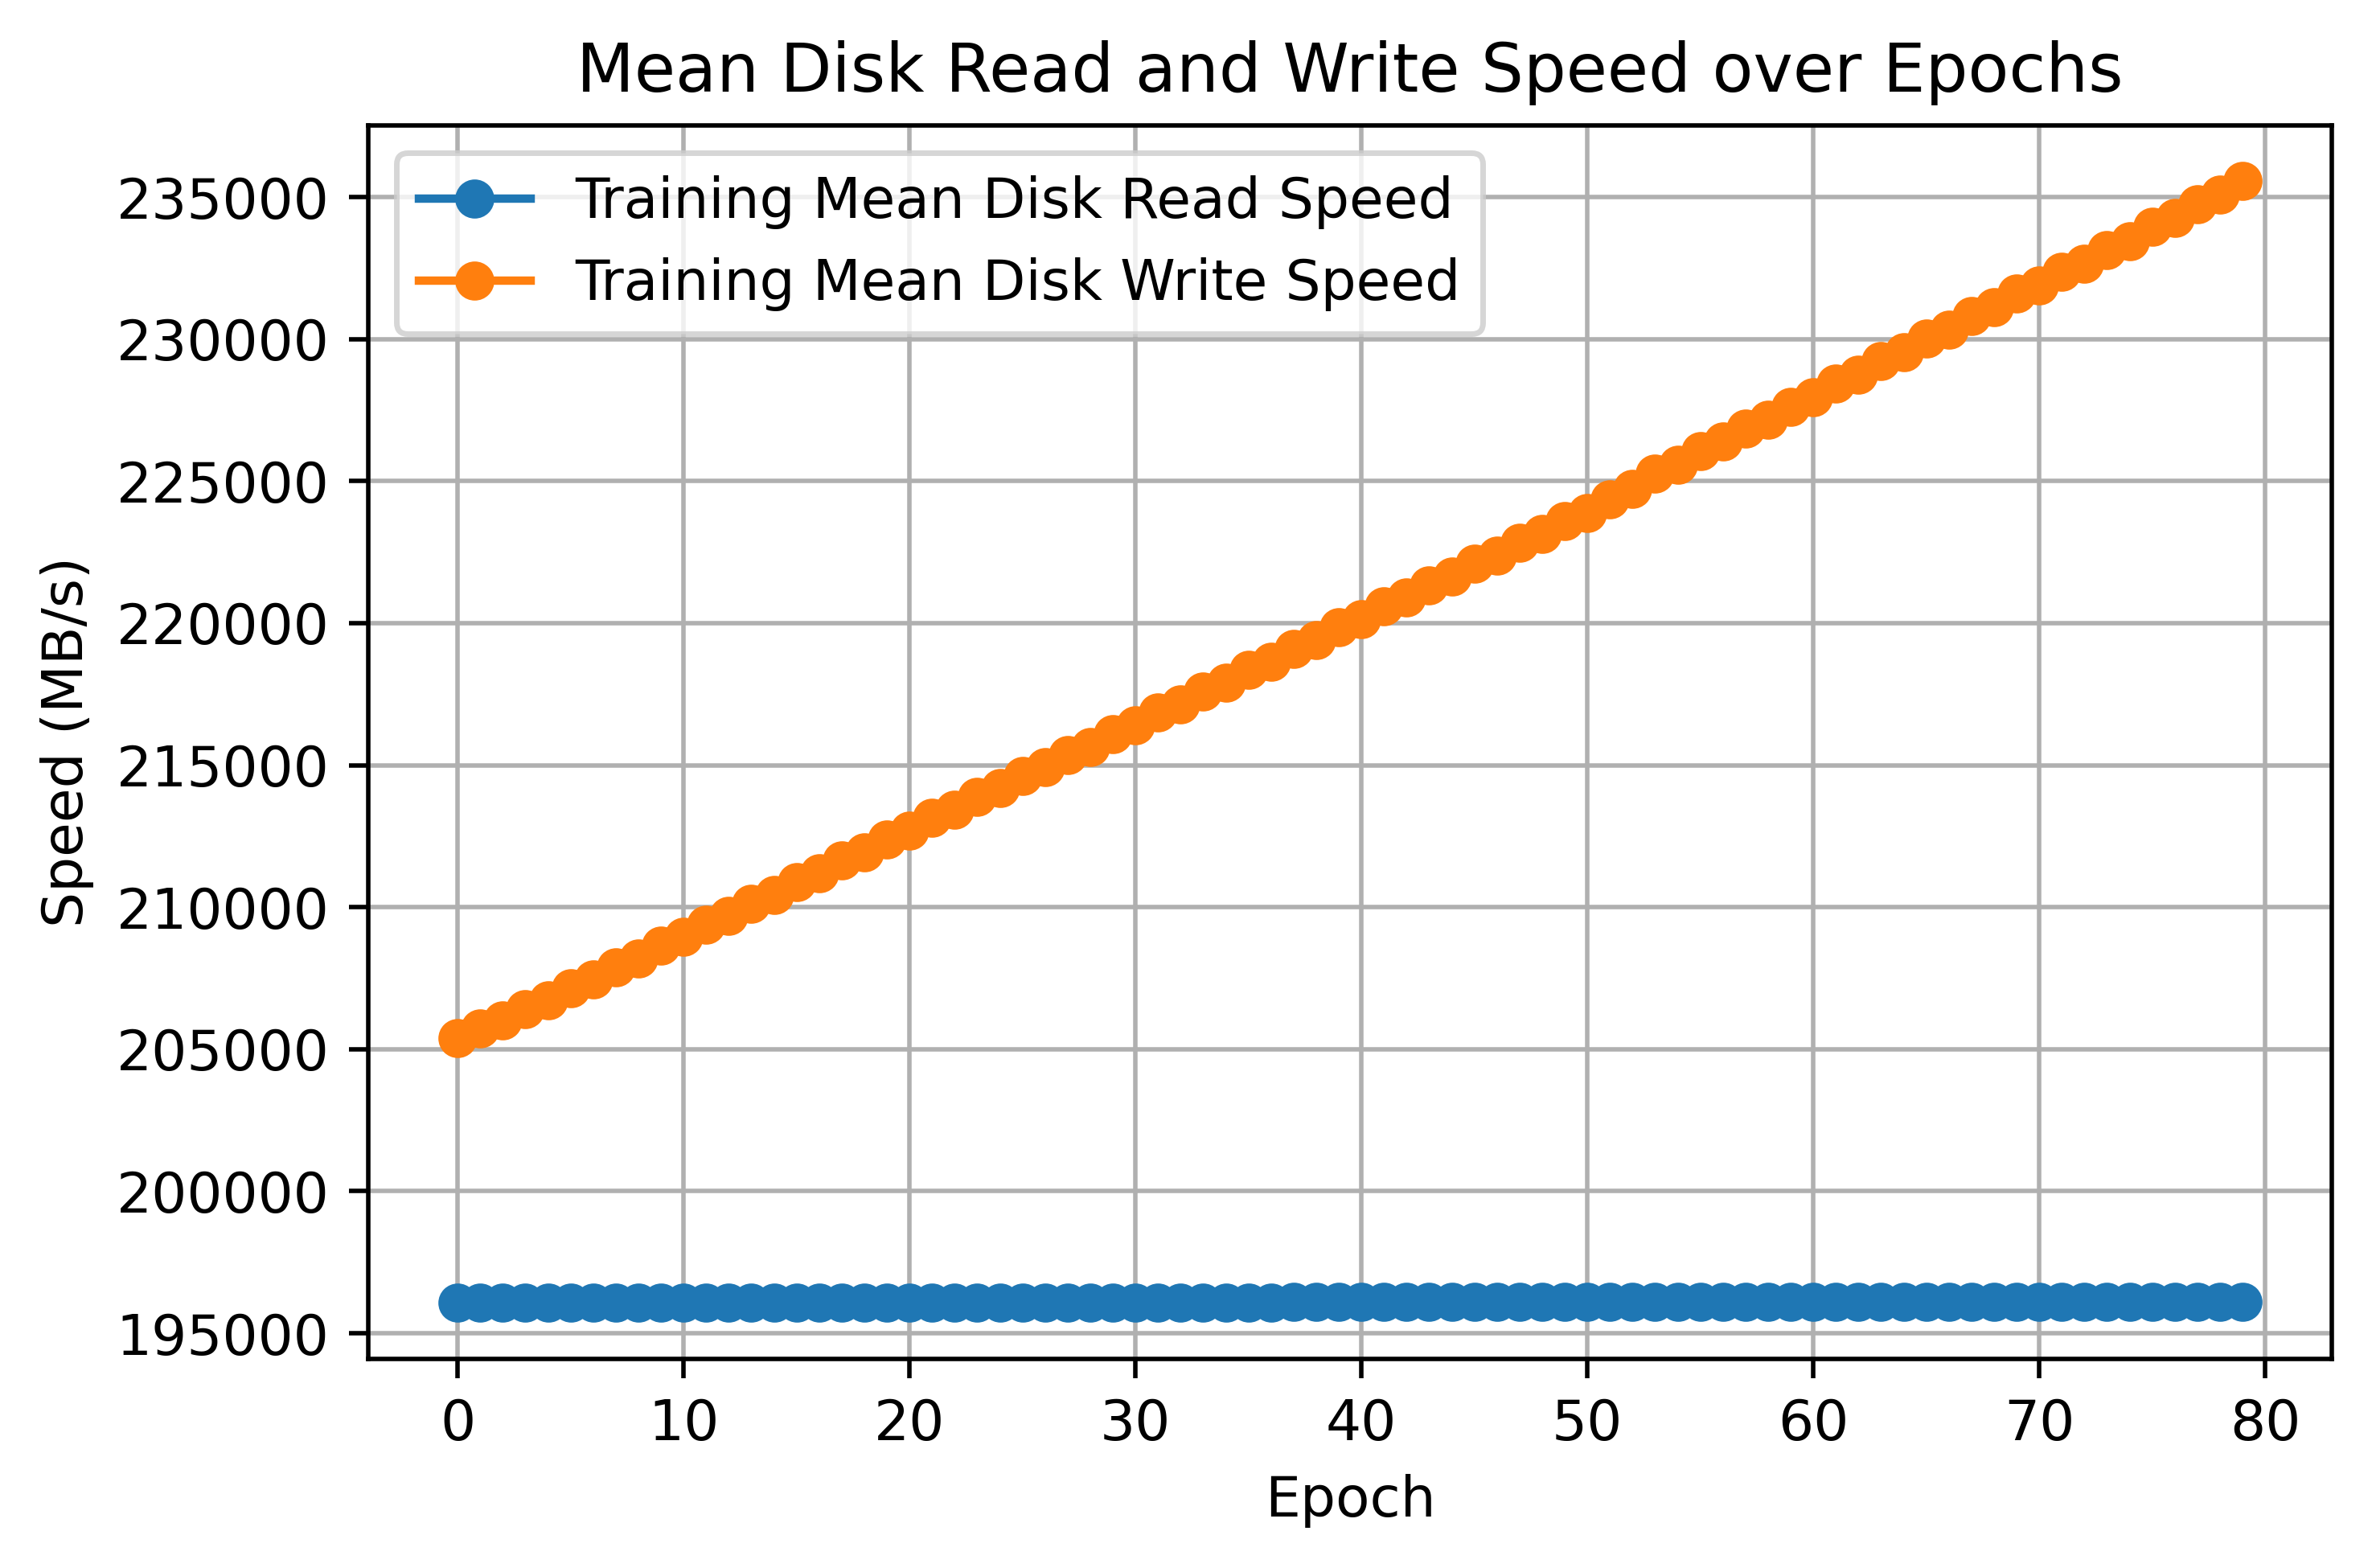

In [10]:
# %% Imports
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# %% Configurations
train_file_name = "t5llm_train1"
graphs_save_folder = "./t5llmNewGraphs/"

train_file_name = "opt_train1"
graphs_save_folder = "./opt_NewGraphs/"


train_file_name = "gpt_train1"
graphs_save_folder = "./gpt_NewGraphs/"

os.makedirs(graphs_save_folder, exist_ok=True)

log_dir = os.path.join(r'C:\Users\User\Documents\GitHub\L4S-LLM\Log Viz', f'{train_file_name}')
label_name = "Training "

# %% Function to convert actions to classes
def convert_to_classes(action):
    if action < 0.5:
        return 0
    elif action < 1.5:
        return 1
    else:
        return 2

# %% Function to plot and save graphs
def plot_and_save(x, y_list, y_labels, title, xlabel, ylabel, filename, ylim=None):
    plt.figure(figsize=(6, 4), dpi=500)
    for y, label in zip(y_list, y_labels):
        plt.plot(x, y, marker='o', label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(graphs_save_folder, f"{filename}.png"), dpi=500, bbox_inches='tight')
    plt.savefig(os.path.join(graphs_save_folder, f"{filename}.eps"), dpi=500, bbox_inches='tight')
    plt.savefig(os.path.join(graphs_save_folder, f"{filename}.pdf"), dpi=500, bbox_inches='tight')
    plt.show()

# %% Initialize lists for metrics
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []
mean_cpu_usage = []
mean_ram_usage = []
mean_gpu_usage = []
mean_vram_usage = []
mean_disk_read_speed = []
mean_disk_write_speed = []

# %% Process Log Files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_train_') and f.endswith('.json')]
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)

        losses = [step['train_loss'] for step in data['steps']]
        actions_preds = [step['actions_pred'] for step in data['steps']]
        actions = [step['actions'] for step in data['steps']]

        # Compute loss metrics
        mean_losses.append(np.mean(losses))
        median_losses.append(np.median(losses))

        # Compute accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_indices = np.array(preds).argmax(axis=1).flatten()
            true_classes = np.vectorize(convert_to_classes)(np.array(true_actions).flatten())
            accuracies.append((preds_indices == true_classes).mean())
        mean_accuracies.append(np.mean(accuracies))

        # Compute resource usage metrics
        cpu_usages = [step['CPU Usage'] for step in data['steps']]
        ram_usages = [step['RAM Usage'] for step in data['steps']]
        gpu_usages = [step['GPU Usage'] for step in data['steps']]
        vram_usages = [step['VRAM Usage'] for step in data['steps']]
        disk_read_speeds = [step['Disk Read Speed (MB/s)'] for step in data['steps']]
        disk_write_speeds = [step['Disk Write Speed (MB/s)'] for step in data['steps']]

        mean_cpu_usage.append(np.mean(cpu_usages))
        mean_ram_usage.append(np.mean(ram_usages))
        mean_gpu_usage.append(np.mean(gpu_usages))
        mean_vram_usage.append(np.mean(vram_usages))
        mean_disk_read_speed.append(np.mean(disk_read_speeds))
        mean_disk_write_speed.append(np.mean(disk_write_speeds))

# %% Create DataFrame
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies,
    'Mean CPU Usage': mean_cpu_usage,
    'Mean RAM Usage': mean_ram_usage,
    'Mean GPU Usage': mean_gpu_usage,
    'Mean VRAM Usage': mean_vram_usage,
    'Mean Disk Read Speed': mean_disk_read_speed,
    'Mean Disk Write Speed': mean_disk_write_speed,
})

# %% Plot and Save Graphs
plot_and_save(df['Epoch'], [df['Mean Loss'], df['Median Loss']],
              [label_name + 'Mean Loss', label_name + 'Median Loss'],
              'Mean and Median Loss over Epochs', 'Epoch', 'Loss', 'Training_Mean_Median_Loss_Graph')

plot_and_save(df['Epoch'], [df['Mean Accuracy']],
              [label_name + 'Mean Accuracy'],
              'Mean Accuracy over Epochs', 'Epoch', 'Accuracy', 'Training_Mean_Accuracy_Graph', ylim=(0, 1))

plot_and_save(df['Epoch'], [df['Mean CPU Usage']],
              [label_name + 'Mean CPU Usage'],
              'Mean CPU Usage over Epochs', 'Epoch', 'CPU Usage (%)', 'Training_Mean_CPU_Usage_Graph')

plot_and_save(df['Epoch'], [df['Mean RAM Usage']],
              [label_name + 'Mean RAM Usage'],
              'Mean RAM Usage over Epochs', 'Epoch', 'RAM Usage (%)', 'Training_Mean_RAM_Usage_Graph')

plot_and_save(df['Epoch'], [df['Mean GPU Usage']],
              [label_name + 'Mean GPU Usage'],
              'Mean GPU Usage over Epochs', 'Epoch', 'GPU Usage (%)', 'Training_Mean_GPU_Usage_Graph')

plot_and_save(df['Epoch'], [df['Mean Disk Read Speed'], df['Mean Disk Write Speed']],
              [label_name + 'Mean Disk Read Speed', label_name + 'Mean Disk Write Speed'],
              'Mean Disk Read and Write Speed over Epochs', 'Epoch', 'Speed (MB/s)', 'Training_Mean_Disk_Speed_Graph')
